In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


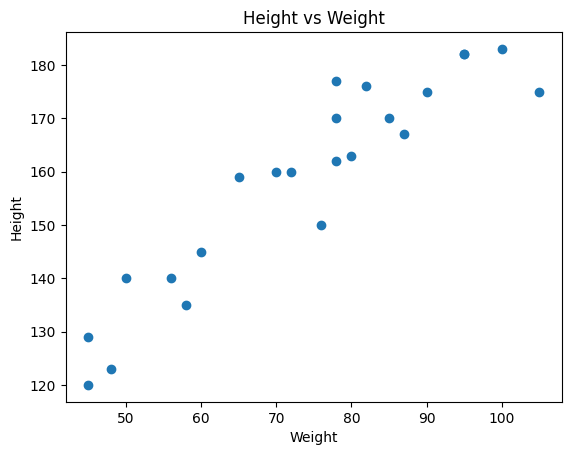

In [7]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


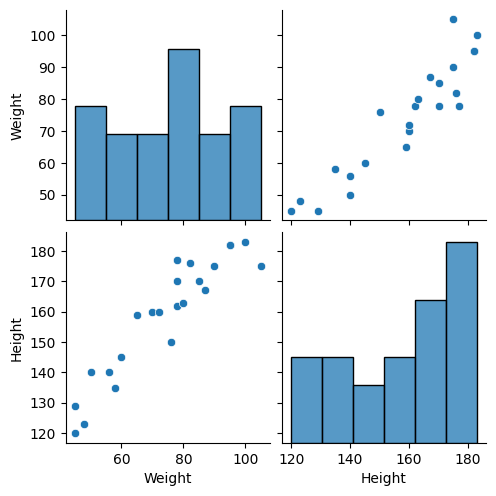

In [9]:
sns.pairplot(df)

In [10]:
X=df[['Weight']]  #Independent feature: Always should be 2D
y=df['Height']

In [11]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [12]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)        #Data leakage prevention: We don't fit on test data, only transform to prevent data leakage

In [18]:
#Apply SLR
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred[:5]
print("coefficient:", regressor.coef_, "intercept:", regressor.intercept_)  
y_test[:5].values



coefficient: [17.03440872] intercept: 157.5


array([177, 170, 120, 182, 159])

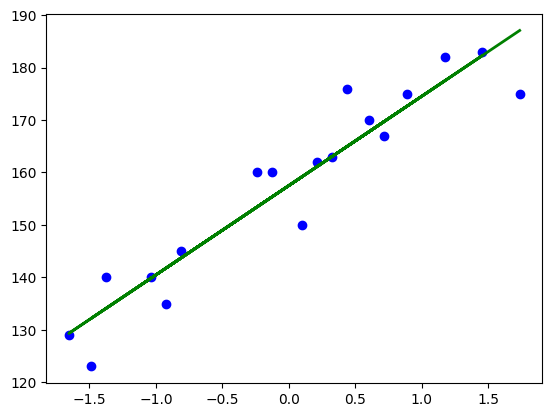

In [20]:
#Visualizing the regression line
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color='green', linewidth=2, label='Regression Line')

In [14]:
#Comparing Actual vs Predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare.head()

,Actual,Predicted
15,177,161.084671
9,170,161.084671
0,120,129.304156
8,182,177.456451
17,159,148.565074


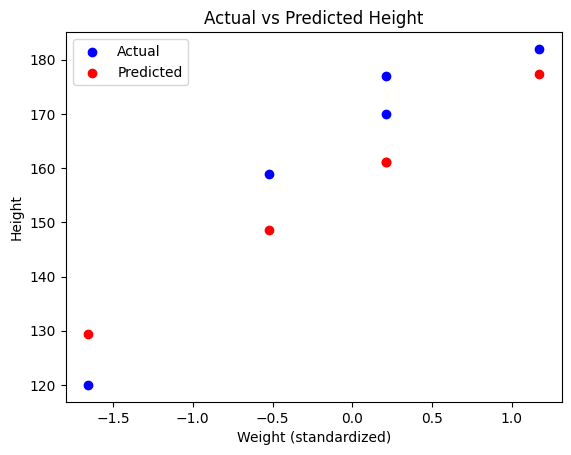

In [15]:
#Visualizing Actual vs Predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Weight (standardized)')
plt.ylabel('Height')
plt.title('Actual vs Predicted Height')
plt.legend()
plt.show()

In [22]:
#Performance Metrics
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')

Mean Absolute Error: 9.822657814519232
Mean Squared Error: 109.77592599051664
Root Mean Squared Error: 10.477400726827081
R^2 Score: 0.776986986042344
Adjusted R^2 Score: 0.7026493147231252


In [ ]:
#OLS Model 
!pip install statsmodels

import statsmodels.api as sm
X_train = sm.add_constant(X_train)  #Adding a constant term for intercept
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
model.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Fri, 21 Nov 2025   Prob (F-statistic):                       0.661
Time:                        06:42:43   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
regressor.predict(scaler.transform([[82]]))  #Predicting height for weight 82

/Users/jay.khandelwal/Documents/Personal/Python/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([164.93685446])